# Tableau pour Cerlico

### Importation des modules

- pickle pour la récupération des données de Conscila
- pandas pour la gestion des csv et les calculs type excel
- numpy pour les calculs en général
- matplotlib pour les graphiques

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy,datetime,pickle,re,codecs,unidecode
import io
from lxml import etree
from IPython.display import display

In [344]:
pd.__version__

u'0.18.0'

In [168]:
%matplotlib inline

In [252]:
repAnnotations="/Users/gilles/ownCloud/Recherche/Rugby/"
fAnnotations={
    "CM":repAnnotations+"France_Argentine-CM-4800.trs",
    "MP":repAnnotations+"France_Argentine-MP-0000.trs",
    "CF":repAnnotations+"France_Argentine-CF-3250.trs",
    "FB":repAnnotations+"France_Argentine-FB-1620.trs",
    "GB":repAnnotations+"France_Argentine-GB-2400.trs",
             }
minTime={
    "MP":0.0,
    "FB":1619.20,
    "GB":2400.0,
    "CF":3250.0,
    "CM":4793.0,
}
maxTime={
    "CM":6500.0,
    "MP":1620.0,
    "CF":4900.0,
    "FB":2400.0,
    "GB":2719.0,
}
decalage={
    "CM":1055.0,
    "MP":0.0,
    "CF":1055.0,
    "GB":0.0,
    "FB":0.0,
}
listeInsertions={
    "CM":[u"qui l'a fait commettre un en-avant",u"surclassés",u"ballons",u"de pénalités"],
    "MP":[],
    "CF":[u"qui l'a fait commettre un en-avant"],
    "GB":[],
    "FB":[u"et les bâtons",u"début",u"tonique euh il peut regardez cinq mètres derrière il peut continuer"],
}
alignementsManuels={
    "CM":[14, 4, 6, 11, 1, 2, 2, 3, 1, 4,
          3, 4, 2, 1, 2, 2, 15, 16, 3, 2,
          12, 2, 6, 4, 5, 3, 3, 3, 1, 1, 2,
#          17, 10, 4, 2, 2, 2, 2, 2, 1, 6,
          17, 10, 4, 2, 2, 2, 2, 1, 6,
          13, 1, 2, 14, 4, 1, 11, 7, 5, 2,
          8, 18, 2, 2, 7, 9, 2, 1, 2, 19, 1,
          8, 4, 1, 2, 1, 2, 7, 5, 2, 2, 9, 1,
          2, 10, 2, 4, 2, 11, 3, 4, 3, 1,
          2, 1, 2, 2, 2],
    "MP":[
          1,1,1,1,1,2,1,1,2,
          1,1,1,1,2,2,2,3,1,1,
          2,2,1,2,4,1,1,2,3,1,
          1,1,1,2,2,1,5,1,1,6,
          3,2,1,1,3,3
         ],
    "CF":[
          2,2,1,2,1,9,4,2,1,8,
          9,2,1,10,1,2,3,1,5,8,
          2,1,6,10,2,2,2,1,2,3,
          9,1,11,1,2,12,1,2,2,
          5,4,4,5,3,13,3,4,3,1,
          2,1,2,2,2,1,14,4,6
         ],
    "GB":[6, 7, 7, 1, 1, 8, 3],
    "FB":[1,3,2,1,3,4,3,2,2,1,2,1,3,4,1,5,1,3,1,6,2,1,4,1,5,1,7,2]
}
partiesDF={}

## Récupération des données précédentes

Le fichier *Timeline-RDVTACP.pkl* dans le répertoire *CorpusRugby2007* contient toutes les correspondances calculées prédédemment.

In [170]:
repRDVTACP="/Users/gilles/pCloud Drive/FOD/Copy/Recherche/Rugby/CorpusRugby2007/"
fRDVTACP=repRDVTACP+"Timeline-RDVTACP.pkl"

In [171]:
with open(fRDVTACP,"rb") as inFile:
    dfRDVTACP=pickle.load(inFile)

In [172]:
print ", ".join(dfRDVTACP.columns.tolist())

RJ1.00, RJ2.00, RJ3.00, RJ4.00, RJ5.00, RJ6.00, RJ7.00, RJ8.00, RC1.00, RC2.00, RC3.00, RC4.00, RC5.00, RC6.00, RC7.00, RC8.00, timeline, trscode, D1.00, D2.00, D3.00, D4.00, D5.00, D6.00, D7.00, D8.00, D9.00, D10.00, D11.00, D12.00, S1D1.00, S1D2.00, S1D3.00, S1D4.00, S1D5.00, S1D6.00, S1D7.00, S1D8.00, S1D9.00, S1D10.00, S1D11.00, S1D12.00, S2D1.00, S2D2.00, S2D3.00, S2D4.00, S2D5.00, S2D6.00, S2D7.00, S2D8.00, S2D9.00, S2D10.00, S2D11.00, S2D12.00, S3D1.00, S3D2.00, S3D3.00, S3D4.00, S3D5.00, S3D6.00, S3D7.00, S3D8.00, S3D9.00, S3D10.00, S3D11.00, S3D12.00, V1.00, V2.00, V3.00, V4.00, V5.00, V6.00, V7.00, V8.00, V9.00, V10.00, V11.00, V12.00, S1V1.00, S1V2.00, S1V3.00, S1V4.00, S1V5.00, S1V6.00, S1V7.00, S1V8.00, S1V9.00, S1V10.00, S1V11.00, S1V12.00, S2V1.00, S2V2.00, S2V3.00, S2V4.00, S2V5.00, S2V6.00, S2V7.00, S2V8.00, S2V9.00, S2V10.00, S2V11.00, S2V12.00, S3V1.00, S3V2.00, S3V3.00, S3V4.00, S3V5.00, S3V6.00, S3V7.00, S3V8.00, S3V9.00, S3V10.00, S3V11.00, S3V12.00, timecode, déb

Il faut choisir les colonnes à conserver pour le rythme, le débit, la vitesse

In [173]:
selectionNumeriques="RJ5.00 RC5.00 timeline trscode D5.00 S1D5.00 S2D5.00 S3D5.00 V5.00 S1V5.00 S2V5.00 S3V5.00 timecode début fin numEvent numAct dureeS1 dureeS2 PxP colour support sumPxP sumColour sumSupport pause suivant durée plage même".split(" ")
selectionAlphas="événement action commentaires numSpk Spk texte texte-PxP texte-colour texte-support".split(" ")
selectionColonnes="RJ5.00 RC5.00 timeline trscode D5.00 S1D5.00 S2D5.00 S3D5.00 V5.00 S1V5.00 S2V5.00 S3V5.00 timecode début fin numEvent événement numAct action commentaires numSpk Spk texte texte-PxP texte-colour texte-support dureeS1 dureeS2 PxP colour support sumPxP sumColour sumSupport pause suivant durée plage même".split(" ")
if set(selectionNumeriques)|set(selectionAlphas)!=set(selectionColonnes):
    print "pb de sélection"
else:
    print "sélection ok"
df=dfRDVTACP[selectionColonnes].copy()

sélection ok


In [174]:
for c in selectionNumeriques:
    df[c]=pd.to_numeric(df[c], errors='coerce')

In [175]:
#df.set_index("timeline")[["RJ5.00","V5.00"]].interpolate().plot(figsize=(100,8))


In [176]:
#df[df["timeline"]<=627000.0][["timeline","RJ5.00","V5.00"]].set_index("timeline").interpolate().plot(figsize=(100,8))


## Ajustements sur les anciennes données

In [177]:
df["texte"]=df["texte"].str.strip()

In [238]:
decMiTemps=1055
ajustements={
    u"apr\xe8s avoir demand\xe9 si tout le monde \xe9tait pr\xeat le coup d'envoi de la coupe du monde deux mille sept":u"apr\xe8s avoir demand\xe9 si tout le monde \xe9tait pr\xeat, le coup d'envoi de la coupe du monde deux mille sept",
    u'est donn\xe9 par David Skrela':u'est donn\xe9 par David Skrela.',
    u"spk2-071":u"oui il reviendra à l'en-avant de Mignoni",
    u"trotteuses que nous":u"trotteuses que nous regardez",
    u"spk1-1601":"",
    u"réagissent":u"réagissent on est bien",
    u"première gross alerte":u"première grosse alerte"
}
ajustementsTimes={
    1571.66:u"ce début de partie on est très fébriles côté français",
    1488.68:u"réagissent on est bien",
    1487.72:u"oh bien",
    1489.44:u"oh la la et qui vont",
    170.56:u"l'équipe oh hé bien",
    266.36:u"euh Bernard Laporte euh et oui pas content Bernard",
    693.2:u"féroce ah ouais",
    697.84:u"c'est un niveau",
    740.52:u"la défense française oh la rage",
    760.76:u"il est pris Rémy Martin",
    779.04:u"l'ascendant sur l'Argentine oui oui",
    857.24:u"ces plaquages ah c'est bon ça",
    858.92:u"de regroupement ah très bien",
    937.56:u"de la vitesse et oui oui",
    1073.68:u"oui ils sont devant nous",
    1079.36:u"Thierry hein",
    1152.48:u"va à droite il dirige",
    1302.6:u"attention de trouver des touches hein toujours trouver des touches explication Nani Corleto l'arrière de",
    1318.2:u"alors ça c'est intelligent ils progressent",
    1320.76:u"c'est intelligent le ballon est",
    1438.64:u"puisque les Français alors oui",
    1477.12:u"oh ça",
    1551.04:u"introduction argentine c'est plus dur",
    ## FB
    1623.83:u"parce que grâce au saignement en tout cas il faut être prêt et rentrer rapidement et ressortir",
    1631.96:u"il faut rentrer et ressortir",
    1784.96:u"qu'est passé à Castres qui a joué",
    1786.64:u"Castres ouais ouais",
    1863.72:u"la ça va vite et attention",
    1911.60:u"ah les canes comme on dit dans le jargon rugby de Corleto on le sait il va vite",
    1914.84:u"est-ce qu'il a Dominici et Heymans euh devant lui voilà regardez cette interception sur la passe de Martin",
    1922.40:u"hé oui c'est cinquante cinquante ah avec Jauzion et",
    1940.40:u"on les soutient encore pour le moment",
    1955.80:u"oui il",
    1972.56:u"ah ouais mais il a pendant un moment",
    2038.64:u"Mignoni Skrela Argentins",
    2297.04:u"oh ça part bien ouais",
    2366.80:u"pour alterner surtout",
    ## GB
    2415:u"elle les perd trop vite",
    2418.08:u"aujourd'hui on ouais",
    2421.12:u"Fabrice hein si",
    2528.64:u"il faut ouais",
    2564.8:u"là ouais",
    2572.32:u"pour que cette structure cette cocotte qui est partie",
    2426.24:u"ah ouais faut dynamiser et le dynamiteur chez nous qui est viral d'ailleurs ce dynamisme c'est Mignoni",
    2577.24:u"et elle fixe les joueurs",
    2583.4:u"regardez si y'en a déjà deux là Argentins sur Ibañez c'est que quelque part ils sont pas sur la largeur",
    2628.4:u"en position d'ailiers c'est que quelque part euh si on met un un trois-quart en face ça va faire drôle quand même",
    2265.52:u"qui va nous",
    2283.48:u"j'espère ne pas m'être trompé",
    2305.52:u"pour l'Argentine sur cinquante mètres",
    2368.96:u"pied aussi hein ah oui ah oui",
    2381.60:u"et Rémy Martin qui vient batailler encore et Rémy Martin oui",
    ## CF
    4462.82:u"oui donc euh déjà première consigne Bernard Laporte a dû dire soulagez Skrela",
    4516.98:u"cette fois pour faire jouer les gros au large oui au large oui c'est bien oui",
    4529.38:u"on se barre de ah ça y est hein ça y est mon cher Thierry on y est",
    4547.94:u"il a pas fait",
    4548.38:u"hé Rémi là ça ça s'arrête là hein il faut plus donner de ballons hein on les garde là il y a un Argentin au milieu",
    4553.06:u"ouais mais on leur dit tellement aussi qu'il on leur donne plus on donne plus",
    4559.62:u"de Rémi Martin l'intention est très bonne",
    4562.5:u"ou alors un problème de couleurs entre le bleu clair et bleu et bleu et bleu foncé",
    4595.74:u"désossé là Dominici regardez",
    4605.86:u"regardez le un il est en position de centre là argentin regardez vous le voyez à l'écran là",
    4609.58:u"et voilà il appelle d'ailleurs venez m'aider parce que la quand même ça va vite hé oui",
    4682.7:u"oui les airs",
    4687.86:u"dans le sol au sol",
    4727.9:u"un ballon qui est au fond ah oui",
    4773.78:u"avec ce ballon là qui est devant Harinordoquy caché par l'arbitre",
    4792.5:u"avec encore Thion marteau piqueur",
    4808.06:u"ah il y a des sécateurs hein vous l'avez dit ça regardez ça ça",
    4810.26:u"les tondeuses à gazon bloque au niveau des chevilles",
    4846.86:u"eh oui ce ballon gardé au il a gardé la balle au sol",
    4926.3:u"ouais Thierry",
    4929.02:u"l'homme a saignement",
    5028.86:u"et Hernandez",
    5075.14:u"hein voilà",
    5068.54:u"ouais voilà ce qu'il faut expliquer c'est quand y a un tas pour venir se joindre au tas",
    5178.18:u"qui fait ouais ouais",
    5227.3:u"espoir et même confiance à l'équipe de France ah enfin on occupe le terrain argentin",
    5240.3:u"oui et",
    5266.3:u"qui a pris l'intervalle allez allez",
    5289.78:u"du dynamisme c'est bien",
    5438.49:u"française et",
    5315.06:u"allez mêlée introduction française",
    5337.58:u"de l'équipe de France regardez voilà",
    5340.02:u"et on revoit les extérieurs",
    5447.82:u"en défense sur la la largeur du terrain parce qu'on a pas de ballon dynamique",
    5367.22:u"Jauzion ouais",
    5402.9:u"ah oui ah oui intense hein c'est formidable",
    5459.82:u"sa tête il pouvait pas le sortir Ostiglia ouais",
    5495.82:u"ah alors ça c'est terrible celle-là parce qu'en ouais",
    5503.02:u"ouh la la à dix-sept neuf",
    5504.18:u"on a huit points",
    5505.18:u"c'est terrible donc un essai transformé",
    5507.98:u"ça passe à droite ah oui",
    5542.78:u"pour Jauzion là-bas allez il faut aller dessus",
    5565.02:u"ah c'est parfait c'est parfait dans l'aire de jeu voilà parfait parfait",
    5680.02:u"carton jaune Thierry",
    5711.66:u"technique et volontaire c'est ça",
    5846.58:u"Betsen oh",
    ### CM
    5848.49:u"oh il avait très bien joué Chabal il est allé", #différent entre CF et CM
    5935.62:u"suppléer à David ouais ouais",
    5992.86:u"transmet oui oui",
    6001.82:u"Mignoni oh oh jaune jau(ne)",
    6071.54:u"je dois dire je vous l'accorde",
    6113.5:u"ouais",
    6143.1:u"de Corletto oui parce que",
    6159.22:u"et on la fait à l'endroit où on a l'habitude de la jouer",
    6203.78:u"bravo est impor(tante)",
    6226.7:u"dans le ah",
    6227.06:u"ah oui coeur",
    6230.7:u"sur ses ah non",
    6234.62:u"ça hein tout à fait",
    6245.7:u"avec un très bon pack d'avants et un Chabal royal",
    6271.54:u"Ledesma",
    6277:u"elle est pas très droite",
    6341.86:u"non non donnez pas donnez plus a dit l'arbitre",
    6370.42:u"pas lâché debout",
    6372.18:u"il l'a pas lâché",
    6373.7:u"on plaque en bas hein ça tombe hein",
    6417.46:u"ouais ouais moi y'a eu deux trois gifles qui sont parties sur ce coup-là",
    6421.7:u"ouais",
    6426.74:u"et on structure là il est au chaud et on structure",
    6428.54:u"le ballon est derrière le ballon est au chaud il peut rien nous arriver",
    6437.22:u"euh tranquilles avec ça absents ouais",
    6442.9:u"faudrait quand même euh",
    6473.78:u"(Spread)bury pénalité ah",
    6486.14:u"dès qu'on a le ballon c'est trop tard il faut regarder avant il a vu que le",
    6502.02:u"on est à la écoutez il reste",
    6540.58:u"dynamisme français",
    6541.14:np.NaN,
    6597.82:u"avec six points de s'il faut gagner",
    6600.78:u"comme ils craquent Fabien Landreau l'a dit",
    6602.26:u"tiens Elissalde à l'image allez",
    6605.7:u"continuez dans le rythme",
    6611.62:u"y'a du coaching",
    6677.66:u"c'est Martín Durand le troisième ligne qui rentre à la place d'Ostiglia",
    6681.46:u"et Senni- Sennilosa qui rentre à la place de Contepomi",
    6774.22:u"quand le numéro un à cinq est blessé on arrête le jeu quand c'est les autres numéros on arrête pas le jeu",
    6841.26:u"six ouais",
    6872.34:u"avec Senillosa",
    6891.94:u"voilà ouais bien sûr",
    6939.58:u"non c'est pas Elissalde qui va se charger de ce renvoi il va aller derrière ses avants derrière les",
    6959.18:u"ouais alors Harinordoquy oh",
    6960.9:u"et quelle belle prise de balle c'est bien",
    6966.42:u"allez y'a des gros là-bas ils vont",
    6980.1:u"mon* ballon qui bouge toujours",
    7004.54:u"qu'est-ce qu'on peut donner de ballons aujourd'hui à ces Argentins qui sont à l'agonie mais",
    7010.66:u"une seule leur courage leur courage leur agressivité leur courage",
    7130.82:u"appuis oui",
    7204.3:u"de France crucial hein",
    7208.62:u"ça c'est formidable voilà vivacité",
    7246.26:u"mais pas de bonus défensif dans une poule où y'a également l'Irlande",
    7257.38:u"avec Jauzion allez",
    7264.5:u"Elissalde non pas à gauche",
    7273.38:u"c'est contact oui mais on revient à la faute",
    7278.98:u"laissé aux allez",
    7290.5:u"mais ils tiennent ils tiennent les Argentins",
    7295.94:u"d'Argentine ils tiennent allez allez",
    7372.9:u"au goal average au point",
    7394.54:u"ici en quart de finale encore aujourd'hui",
    7415.94:u"l'Australie l'Australie oui",
    7441.46:u"et puis l'interception",
    7472.1:u"avec Christian Jean-Pierre Aubin Hueber",
    7479.78:u"nous on se retrouvera demain soir",
    7484.86:np.NaN,
}

for ajustement in ajustements:
    df.loc[df['texte'] == ajustement,"texte"]=ajustements[ajustement]
for ajustementsTime in ajustementsTimes:
    df.loc[df["début"]==ajustementsTime,"texte"]=ajustementsTimes[ajustementsTime]

In [255]:
df[(df["début"].astype(float)>=(4440+decalage["CM"]))][["timecode","début","fin","texte","Spk"]]

,timecode,début,fin,texte,Spk
13241,496851.0,5495.82,5497.14,ah alors ça c'est terrible celle-là parce qu'e...,spk2
13242,NaN,5495.82,5495.88,ah alors ça c'est terrible celle-là parce qu'e...,NaN
13244,NaN,5496.71,5498.14,NaN,NaN
13246,496983.0,5497.14,5499.66,on revenait à dix-sept douze ce qui veut dire ...,spk2
13249,NaN,5499.45,5500.13,NaN,NaN
13250,497251.0,5499.82,5500.70,un essai vaut cinq points hein,spk2
13252,NaN,5500.65,5500.69,NaN,NaN
13254,497375.0,5501.06,5503.02,un essai transformé vous pouvez toujours gagne...,spk2
13255,NaN,5501.16,5501.65,NaN,NaN
13256,NaN,5501.78,5501.82,NaN,NaN


In [202]:
print df.iloc[5879]["texte"]
print u"tonique euh il peut regardez cinq mètres derrière il peut continuer"

dans la moitié de terrain de l'Argentine
dans la moitié de terrain de l'Argentine


In [256]:
#Suppression du doublon créé par les remplacements
df.iloc[13242,df.columns.get_loc('texte')]=np.NaN

### Tests anciennes données

## Compilation des annotations de tours pour l'émotion, l'excitation et le type de discours

In [78]:
repAnnotations="/Users/gilles/ownCloud/Recherche/Rugby/"
fAnnotationsMP=repAnnotations+"France_Argentine-MP-0000.trs"
fAnnotationsCF=repAnnotations+"France_Argentine-CF-3250.trs"
fAnnotationsCM=repAnnotations+"France_Argentine-CM-4800.trs"
parser = etree.XMLParser(remove_blank_text=True)
maxTimeMP=1650.0
minTimeCM=4793.0
maxTimeCM=6500.0
minTimeCF=3250.0
maxTimeCF=4900.0

In [79]:
def unique(sequence):
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]

def jList(liste,sep=","):
    lListe=unique(liste)
    return sep.join([e for e in lListe if e!=""])

# Traitement pour une partie

In [80]:
def getListeTours(idAnnotations):
    def scaleExcitation(chaine):
        result=""
        if chaine=="1":
            result="0.0"
        elif chaine in ["1,2","2,1"]:
            result="1.0"
        elif chaine=="2":
            result="2.0"
        elif chaine in ["3,2","2,3"]:
            result="3.0"
        elif chaine=="3":
            result="4.0"
        return result
            
    xmlTRS=etree.parse(fAnnotations[idAnnotations],parser)
    listeTours=[]
    for ligne in xmlTRS.xpath("//Turn"):
        debut=float(ligne.attrib["startTime"])
        if minTime[idAnnotations]<=debut<=maxTime[idAnnotations]:
            fin=float(ligne.attrib["endTime"])
            lTextes=[e.strip() for e in list(ligne.itertext()) if e.strip()!=""]
            lTour=[]
            lDiscours=[]
            lEmotions=[]
            lExcitation=[]
            for l in lTextes:
                splitL=[e.strip() for e in re.split(ur"\[([^\]]*)\]",l) if e!=""]
                lenSplitL=len(splitL)
                if lenSplitL%2!=0:
                    print "pas d'annotation", l, debut, fin
                    lTour.append(l.strip())
                else:
                    for tour,crochet in zip(*(iter(splitL),) * 2):
                        discours=""
                        emotion=""
                        excitation=""
                        lTour.append(tour.strip())
                        annotations=crochet.split(";")
                        if len(annotations)==3:
                            discours,emotion,excitation=annotations
                        elif len(annotations)==2:
                            discours,excitation=annotations
                        else:
                            print "problème d'annotation", annotations, debut, fin
                        lDiscours.append(discours)
                        lEmotions.append(emotion)
                        lExcitation.append(scaleExcitation(excitation))
            if lTour: 
                listeTours.append((debut,fin,jList(lTour,sep=" "),jList(lDiscours),jList(lEmotions),jList(lExcitation)))
    return listeTours

In [81]:
def choisirAlignementsManuels(idAnnotations,dfAnnotations):
    ixChoix=[]
    for ix,row in dfAnnotations[dfAnnotations["début"]==""].iterrows():
        ixSelect=""
        ref=row["texte"]
        start=row["start"]+decalage[idAnnotations]
        debut=df.loc[(df["texte"]==ref),"début"].values
        debutPossible=df.loc[(df["texte"]==ref) & (abs(df["début"].astype(float)-start)<3),"début"].values
        if len(debutPossible)==1:
            possible=np.where(df.loc[(df["texte"]==ref),"début"].values==debutPossible[0])
            ixSelect=possible[0][0]+1
        xDebut=df[df["texte"]==ref].index
        if debut!=[]:
            print start, ref
            print debut
            print xDebut
            while not ixSelect:
                ixSelect=raw_input("Select index\n")
                try:
                    ixSelect=int(ixSelect)
                except:
                    ixSelect=""
            ixChoix.append(ixSelect)
            if ixSelect and ixSelect!="" and ixSelect<len(xDebut)+1:
                debut=df.iloc[xDebut[int(ixSelect)-1]]["début"]
                fin=df.iloc[xDebut[int(ixSelect)-1]]["fin"]    
                print ixSelect,debut,fin
                dfAnnotations.iloc[ix,dfAnnotations.columns.get_loc('début')]=debut
                dfAnnotations.iloc[ix,dfAnnotations.columns.get_loc('fin')]=fin
            else:
                print "mauvais choix"
            print
    return ixChoix

In [82]:
def appliquerAlignementsManuels(idAnnotations,dfAnnotations):
    numChoix=0
    ixChoix=alignementsManuels[idAnnotations]
    print ixChoix
    for ix,row in dfAnnotations[dfAnnotations["début"]==""].iterrows():
        ref=row["texte"]
        start=row["start"]+decalage[idAnnotations]
        tDebut=df.loc[df["texte"]==ref,"début"].values
        xDebut=df[df["texte"]==ref].index
        if tDebut!=[]:
            ixSelect=ixChoix[numChoix]
            print start, ref, numChoix, ixSelect
            if ixSelect>len(xDebut)+1:
                print "erreur probable",numChoix
                print tDebut
            else:
                debut=df.iloc[xDebut[ixSelect-1]]["début"]
                fin=df.iloc[xDebut[ixSelect-1]]["fin"]
                if abs(start-debut)>1:
                    print "erreur probable",numChoix
                    print ixSelect,debut,fin, "(%f)"%(start-debut)
                    print tDebut
                dfAnnotations.iloc[ix,dfAnnotations.columns.get_loc('début')]=debut
                dfAnnotations.iloc[ix,dfAnnotations.columns.get_loc('fin')]=fin
            numChoix+=1    

In [240]:
def traiterAnnotations(idAnnotations):
    
    listeTours=getListeTours(idAnnotations)
    
    colAnnotations=["start","end","texte","discours","émotion","excitation"]
    dfAnnotations=pd.DataFrame.from_records(listeTours,columns=colAnnotations)
    dfAnnotations["duréeTour"]=dfAnnotations["end"]-dfAnnotations["start"]
#    display(dfAnnotations[dfAnnotations["start"]>=5360.0])
    texteRef=[s.strip() for s in df[(df["texte"].notnull()) & (df["début"]>=minTime[idAnnotations]+decalage[idAnnotations]) & (df["début"]<=maxTime[idAnnotations]+decalage[idAnnotations])]["texte"].tolist()]
    texteRef=[l for l in texteRef if not l.startswith("spk")]
    texteAnnot=[s.strip()for s in dfAnnotations["texte"].tolist() if s!="" and s not in listeInsertions[idAnnotations]]

#    print texteRef
    
    dfAnnotations["début"]=""
    dfAnnotations["fin"]=""
    for t,ref,annot in [(i == j, i,j) for i, j in zip(texteRef, texteAnnot)]:
        if t:
            debut=df.loc[df["texte"]==ref,"début"].values
            fin=df.loc[df["texte"]==ref,"fin"].values
            if len(debut)==1:
                dfAnnotations.loc[dfAnnotations["texte"]==ref,"début"]=debut[0]
            if len(fin)==1:
                dfAnnotations.loc[dfAnnotations["texte"]==ref,"fin"]=fin[0]

    for insertion in listeInsertions[idAnnotations]:
        ixInsertion=dfAnnotations[dfAnnotations["texte"]==insertion].index
        dfAnnotations.loc[ixInsertion,"début"]=dfAnnotations.loc[ixInsertion,"start"]+decalage[idAnnotations]
        dfAnnotations.loc[ixInsertion,"fin"]=dfAnnotations.loc[ixInsertion,"end"]+decalage[idAnnotations]
    
    if alignementsManuels[idAnnotations]==[]:
        alignementsManuels[idAnnotations]=choisirAlignementsManuels(idAnnotations,dfAnnotations)
    else:
        appliquerAlignementsManuels(idAnnotations,dfAnnotations)
    return dfAnnotations


In [250]:
alignementsManuels["CM"][38]=1

In [247]:
def calculerParties():
    for k in fAnnotations:
        print "===================="
        print "PARTIE",k
        print
        partiesDF[k]=traiterAnnotations(k)

In [257]:
calculerParties()

PARTIE FB

pas d'annotation et les bâtons 1738.008 1738.43
pas d'annotation se faire mal aujourd'hui 1738.43 1739.633
pas d'annotation ouais à Bègles à 1786.664 1787.531
[1, 3, 2, 1, 3, 4, 3, 2, 2, 1, 2, 1, 3, 4, 1, 5, 1, 3, 1, 6, 2, 1, 4, 1, 5, 1, 7, 2]
1639.312 et Hernandez 0 1
1646.96 Heymans 1 3
1657.513 ouais 2 2
1662.757 avec Damien Traille 3 1
1680.94 Hernandez 4 3
1693.205 Mignoni 5 4
1720.17 ouais 6 3
1817.614 Ledesma 7 2
1873.986 français 8 2
1874.545 oui 9 1
1899.879 regardez 10 2
1945.544 non 11 1
1955.141 Thierry 12 3
1956.056 Thierry 13 4
1958.226 du côté argentin 14 1
1994.671 Mignoni 15 5
1995.804 avec Skrela 16 1
2041.186 voilà 17 3
2048.643 Mignoni encore 18 1
2165.291 Mignoni 19 6
2166.766 Skrela 20 2
2176.048 dans la moitié de terrain de l'Argentine 21 1
2215.045 Hernandez 22 4
2330.281 au point de chute 23 1
2368.963 ouais 24 5
2373.154 allez 25 1


/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


2390.527 Mignoni 26 7
2391.562 pour Skrela 27 2
PARTIE GB

[6, 7, 7, 1, 1, 8, 3]
2410.269 ouais 0 6
2415.763 ouais 1 7
2451.922 Pichot 2 7
2505.233 tout à fait 3 1
2548.7 Martin 4 1
2611.926 Mignoni 5 8
2613.045 Skrela 6 3
PARTIE MP

pas d'annotation oh hé bien 171.469 172.067
pas d'annotation euh Bernard Laporte euh 267.258 268.701
pas d'annotation oui 671.256 673.124
pas d'annotation ah ouais 694.107 694.65
pas d'annotation c'est un 698.763 699.06
pas d'annotation ouais on 712.739 713.255
pas d'annotation il est pris 761.66 763.272
pas d'annotation ah c'est bon ça 858.139 859.118
pas d'annotation oui 1074.61 1075.505
pas d'annotation Thierry 1080.287 1080.548
pas d'annotation euh Skrela va passer au centre 1088.728 1090.002
pas d'annotation il dirige 1153.387 1153.955
pas d'annotation heureusement 1207.5 1208.273
pas d'annotation alors 1439.568 1440.665
pas d'annotation oui 1439.568 1440.665
pas d'annotation oh 1478.032 1478.245
pas d'annotation ça 1478.032 1478.245
pas d'annotation 

5847.425 oh 54 1
5871.387 ouais 55 14
5880.505 David Skrela 56 4
5936.937 Skrela 57 6


In [259]:
partiesDF["FB"]

,start,end,texte,discours,émotion,excitation,duréeTour,début,fin
0,1620.449,1622.327,ça me permet d'ailleurs Thierry de rappeler que,narration suspensive,,2.0,1.878,1619.52,1621.4
1,1622.618,1624.537,voilà pourquoi on joue à vingt-deux au rugby a...,explication,,2.0,1.919,1621.72,1623.64
2,1624.739,1628.043,parce que grâce au saignement en tout cas il f...,explication,,2.0,3.304,1623.83,1627.12
3,1628.388,1630.774,donc mentalement il faut être concentré quand ...,explication,,2.0,2.386,1627.48,1629.88
4,1631.022,1631.484,c'est plus dur,point de vue,,2.0,0.462,1630.12,1630.56
5,1631.694,1632.503,parce qu'on y est pas dedans,narration,,2.0,0.809,1630.79,1631.6
6,1632.854,1633.653,il faut rentrer et ressortir,narration,,2.0,0.799,1631.96,1632.76
7,1634.043,1636.327,Fernandez Lobbe a très bien pris ce ballon,narration,satisfaction,2.0,2.284,1633.12,1635.4
8,1636.561,1637.535,sur le renvoi français,narration,satisfaction,2.0,0.974,1635.64,1636.64
9,1639.312,1640.332,et Hernandez,narration,,2.0,1.020,1638.4,1639.44


# Association des joueurs aux parties

In [260]:
fJoueurs="NomsJoueurs.txt"
with codecs.open(fJoueurs,"r",encoding="utf8") as inFile:
    lJoueurs="".join(inFile.readlines())

tEquipes=re.split(u"\n(?=.*:)",lJoueurs)

In [261]:
equipes={}
for tEquipe in tEquipes[1:]:
    print tEquipe
    lEquipe=tEquipe.split(u"\n")
    nomEquipe=lEquipe[0].split(":")[0].strip()
    equipes[nomEquipe]={}
    equipe=equipes[nomEquipe]
    for ligne in lEquipe[1:]:
        m=re.match(ur"(.*)\t(.*)",ligne)
        if m:
            print "poste",m.group(1)
            print "joueurs",m.group(2).split(u",")
            poste=m.group(1).strip()
            joueurs=[j.strip() for j in m.group(2).split(u",") if j.strip()!=""]
            if joueurs:
                equipe[poste]=joueurs
    

Angleterre : 

Entraîneur	Brian Ashton
Avants	
	Pilier	Perry Freshwater, Andrew Sheridan, Matt Stevens, Phil Vickery
	Talonneur	George Chuter, Lee Mears, Mark Regan
	Deuxième ligne	Steve Borthwick, Ben Kay, Simon Shaw
	Troisième ligne aile	Lewis Moody, Tom Rees, Joe Worsley
	Troisième ligne centre	Martin Corry, Lawrence Dallaglio, Nick Easter
Arrières	
	Demi de mêlée	Andy Gomarsall, Shaun Perry, Peter Richards
	Demi d'ouverture	Jonny Wilkinson, Olly Barkley
	Centre	Mike Catt, Andy Farrell, Dan Hipkiss, Jamie Noon, Mathew Tait, Toby Flood
	Ailier	Jason Robinson, Paul Sackey
	Arrière	Mark Cueto, Josh Lewsey



poste Entraîneur
joueurs [u'Brian Ashton\r']
poste Avants
joueurs [u'\r']
poste 	Pilier
joueurs [u'Perry Freshwater', u' Andrew Sheridan', u' Matt Stevens', u' Phil Vickery\r']
poste 	Talonneur
joueurs [u'George Chuter', u' Lee Mears', u' Mark Regan\r']
poste 	Deuxième ligne
joueurs [u'Steve Borthwick', u' Ben Kay', u' Simon Shaw\r']
poste 	Troisième ligne aile
joueurs [u'Lewis Moo

In [262]:
def getJoueurs(pays):
    result=[]
    for k,v in equipes[pays].iteritems():
        result.extend(v)
        result=[j.replace(u"(cap.)","").strip() for j in result]
    return result

In [263]:
joueursFr=getJoueurs("France")
joueursAr=getJoueurs("Argentine")
autres=[u"Thierry Lacroix",u"Fabrice Landreau",u"Thierry Gilardi"]

In [264]:
def ajoutNP(lSet,np):
    decNP=unicode(unidecode.unidecode(np))
    lSet.add(np)
    if np!=decNP:
        lSet.add(decNP)

In [265]:
def faireRegexJoueurs(joueurs):
    listeTemp=set()
    for j in joueurs:
        listeTemp.add(j)
        listeTemp.add(unidecode.unidecode(j))
    nomsComplets=u"|".join(sorted(listeTemp))
    prenoms=set()
    noms=set()
    for j in joueurs:
        prenom,nom=j.split(" ",1)
        ajoutNP(prenoms,prenom)
        ajoutNP(noms,nom)
        if " " in nom:
            nomParts=nom.split(" ")
            for n in nomParts:
                if len(n)>2:
                    ajoutNP(noms,n)
#    prenomsSeuls="|".join(sorted(prenoms|noms,key=lambda x:len(x),reverse=True))
#    nomsSeuls="|".join(sorted(noms,key=lambda x:len(x),reverse=True))
    nomsSepares=u"|".join(sorted(prenoms|noms,key=lambda x:len(x),reverse=True))
    return nomsComplets,nomsSepares

In [266]:
nomsCompletsFr,nomsSeparesFr=faireRegexJoueurs(joueursFr)
nomsCompletsFr=nomsCompletsFr.replace(u"Frédéric Michalak",u"Frédéric Michalak|Fred Michalak")
coordJoueursFr=u"%s|%s"%(nomsCompletsFr,nomsSeparesFr)
nomsCompletsAr,nomsSeparesAr=faireRegexJoueurs(joueursAr)
coordJoueursAr=u"%s|%s"%(nomsCompletsAr,nomsSeparesAr)
nomsCompletsOt,nomsSeparesOt=faireRegexJoueurs(autres)
#regexJoueurs=u"(%s|%s|%s|%s)"%(nomsCompletsFr,nomsCompletsAr,nomsSeparesFr,nomsSeparesAr)
regexJoueurs=u"(%s|%s|%s|%s|%s|%s)"%(nomsCompletsFr,nomsCompletsAr,nomsCompletsOt,nomsSeparesFr,nomsSeparesAr,nomsSeparesOt)

In [267]:
def identifierJoueurs(liste):
    identites=set()
    for n in liste:
        for j in joueursFr:
            if unidecode.unidecode(n) in unidecode.unidecode(j): 
                idFr=j+"=Fr"
                identites.add(idFr)
        for j in joueursAr:
            if unidecode.unidecode(n) in unidecode.unidecode(j):
                idAr=j+"=Ar"
                identites.add(idAr)
        for j in autres:
            if unidecode.unidecode(n) in unidecode.unidecode(j):
                idOt=j+"=Ot"
                identites.add(idOt)
    return ";".join(identites)


In [268]:
def associerJoueursPartie(idAnnotations):
    dfTemp=partiesDF[idAnnotations]
    dfTemp["noms"]=np.NaN
    dfTemp["joueurs"]=np.NaN
    for ix,row in dfTemp.iterrows():
        m=re.findall(regexJoueurs,row["texte"])
        if m:
            tourNP=identifierJoueurs(m)
            dfTemp.iloc[ix,dfTemp.columns.get_loc('noms')]=u",".join(m)    
            dfTemp.iloc[ix,dfTemp.columns.get_loc('joueurs')]=tourNP

In [345]:
dfMerges={}
for k in fAnnotations:
    associerJoueursPartie(k)
    dfMerges[k]=df.merge(partiesDF[k],how="left",on=["début","fin","texte"])
    with open(u"partie%s.pkl"%k,"wb") as outFile:
        pickle.dump(dfMerges[k], outFile, pickle.HIGHEST_PROTOCOL)
    dfMerges[k].to_csv(path_or_buf=u"partie%s.csv"%k,sep="\t",encoding="utf8")

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.
/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.
/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


In [346]:
tranches=[
    dfMerges["MP"].iloc[:4319],
    dfMerges["FB"].iloc[4319:6517],
    dfMerges["GB"].iloc[6517:7340],
    dfMerges["CF"].iloc[7340:14444],
    dfMerges["MP"].iloc[14444:],
    ]

In [347]:
tempDF=dfMerges["FB"]
tempDF[tempDF["start"].notnull()]

,RJ5.00,RC5.00,timeline,trscode,D5.00,S1D5.00,S2D5.00,S3D5.00,V5.00,S1V5.00,...,plage,même,start,end,discours,émotion,excitation,duréeTour,noms,joueurs
4322,NaN,NaN,161952.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1620.449,1622.327,narration suspensive,,2.0,1.878,Thierry,Thierry Dusautoir=Fr;Thierry Gilardi=Ot;Thierr...
4327,NaN,NaN,162172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1622.618,1624.537,explication,,2.0,1.919,NaN,NaN
4332,NaN,NaN,162383.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1624.739,1628.043,explication,,2.0,3.304,NaN,NaN
4340,NaN,NaN,162748.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1628.388,1630.774,explication,,2.0,2.386,NaN,NaN
4348,NaN,NaN,163012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1631.022,1631.484,point de vue,,2.0,0.462,NaN,NaN
4351,NaN,NaN,163079.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1631.694,1632.503,narration,,2.0,0.809,NaN,NaN
4355,NaN,NaN,163196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1632.854,1633.653,narration,,2.0,0.799,NaN,NaN
4359,NaN,NaN,163312.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1634.043,1636.327,narration,satisfaction,2.0,2.284,Fernandez Lobbe,Ignacio Fernández Lobbe=Ar;Juan Martín Fernánd...
4367,NaN,NaN,163564.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1636.561,1637.535,narration,satisfaction,2.0,0.974,NaN,NaN
4377,NaN,NaN,163840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1639.312,1640.332,narration,,2.0,1.020,Hernandez,Juan Martín Hernández=Ar


In [365]:
dfComplet=pd.concat(tranches)

In [366]:
with open("partieGlobale.pkl","wb") as outFile:
    pickle.dump(dfComplet, outFile, pickle.HIGHEST_PROTOCOL)

In [367]:
dfComplet.to_csv(path_or_buf="partieGlobale.csv",sep="\t",encoding="utf8")

In [351]:
dfComplet["excitation"]=pd.to_numeric(dfComplet["excitation"], errors='coerce')

In [281]:
import seaborn as sns
sns.set()

In [326]:
dfMatch=dfComplet.iloc[:15700].set_index("timeline")
for c in ["excitation","RJ5.00","D5.00","V5.00"]+"S1D5.00 S2D5.00 S3D5.00 V5.00 S1V5.00 S2V5.00 S3V5.00".split(" "):
    dfMatch[c]=dfMatch[c].interpolate(method="index")

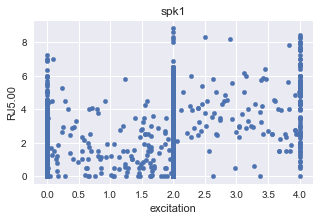

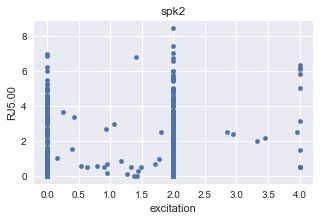

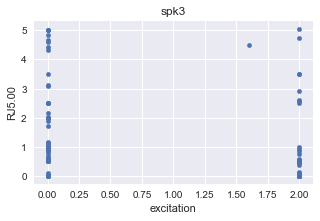

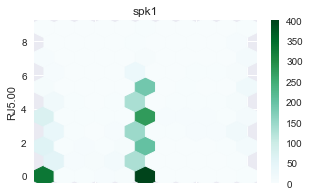

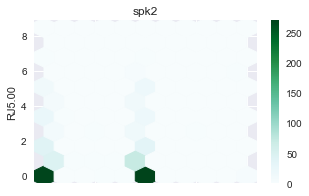

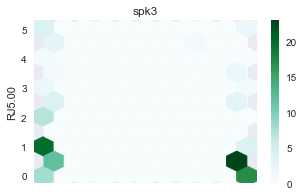

In [327]:
for spk in ["spk%d"%(i+1) for i in range(3)]:
    ax=dfMatch[dfMatch["Spk"]==spk].plot.scatter("excitation","RJ5.00",figsize=(5,3),title=spk)
for spk in ["spk%d"%(i+1) for i in range(3)]:
    ax=dfMatch[dfMatch["Spk"]==spk].plot.hexbin("excitation","RJ5.00",figsize=(5,3),title=spk,gridsize=10)


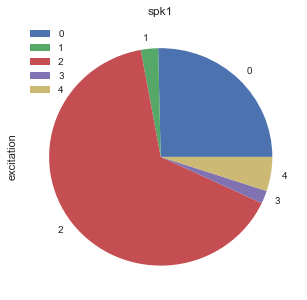

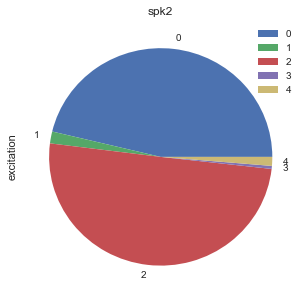

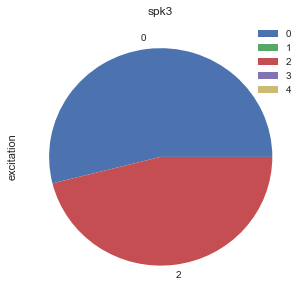

In [306]:
for spk in ["spk%d"%(i+1) for i in range(3)]:
    ax=pd.cut(dfMatch[dfMatch["Spk"]==spk]["excitation"],[0,0.5,1.5,2.5,3.5,5],include_lowest=True,labels=range(5)).reset_index().groupby(by="excitation").count().plot(kind="pie",y="timeline",figsize=(5,5),title=spk)
    ax.set(ylabel="excitation")

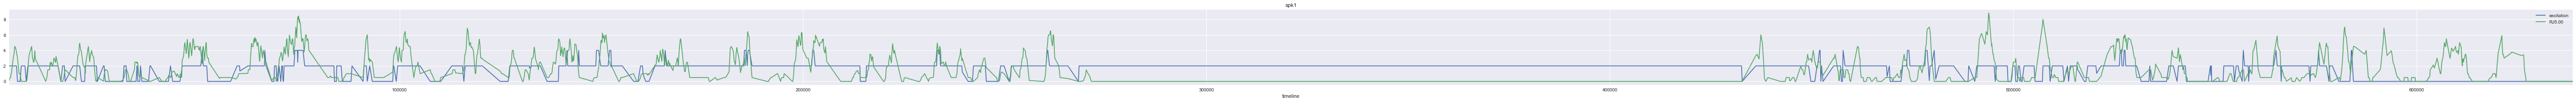

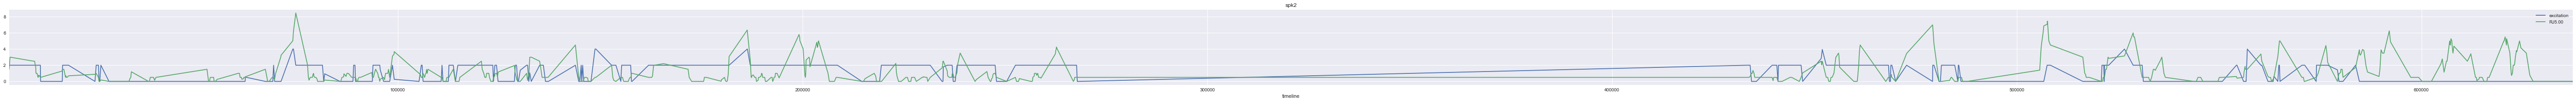

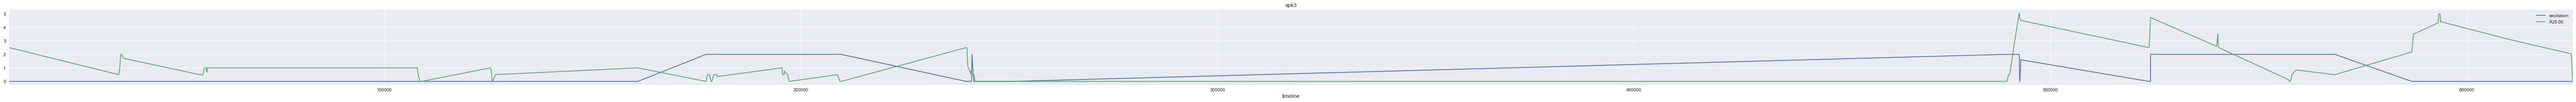

In [285]:
for spk in ["spk%d"%(i+1) for i in range(3)]:
    ax=dfMatch[dfMatch["Spk"]==spk][["excitation","RJ5.00"]].plot(kind="line",figsize=(100,3),title=spk)
    plt.show()

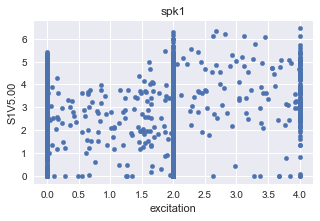

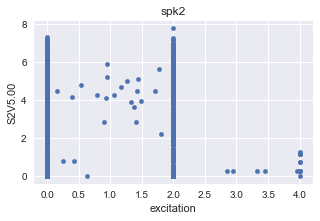

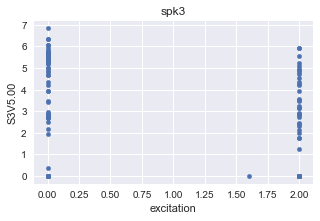

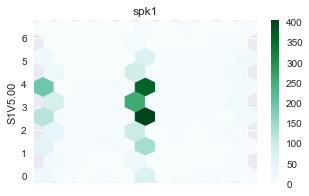

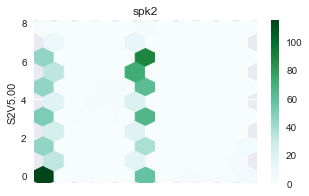

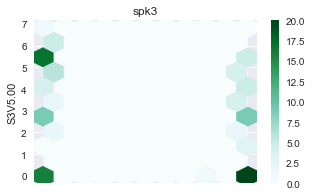

In [286]:
for spk in ["spk%d"%(i+1) for i in range(3)]:
    ax=dfMatch[dfMatch["Spk"]==spk].plot.scatter("excitation","S%sV5.00"%spk[-1],figsize=(5,3),title=spk)
for spk in ["spk%d"%(i+1) for i in range(3)]:
    ax=dfMatch[dfMatch["Spk"]==spk].plot.hexbin("excitation","S%sV5.00"%spk[-1],figsize=(5,3),title=spk,gridsize=10)


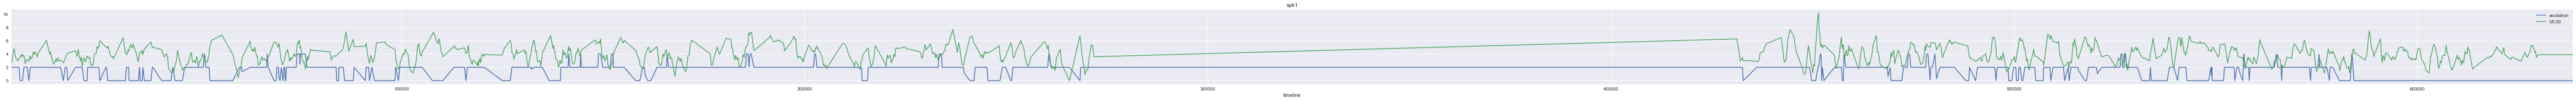

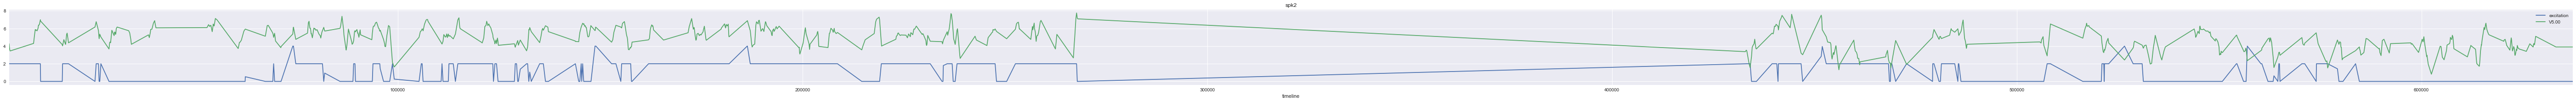

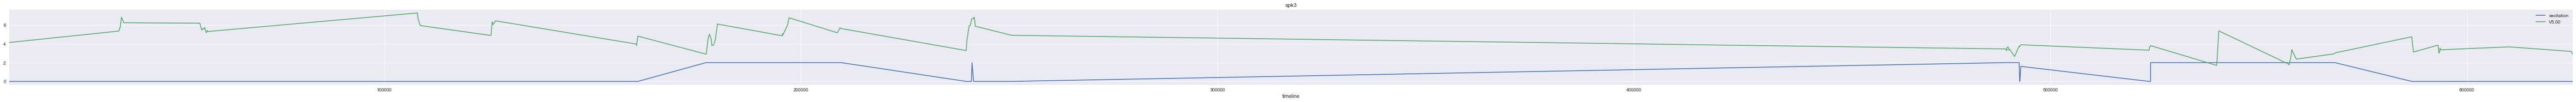

In [288]:
for spk in ["spk%d"%(i+1) for i in range(3)]:
    ax=dfMatch[dfMatch["Spk"]==spk][["excitation","V5.00"]].plot(kind="line",figsize=(100,3),title=spk)
    plt.show()

In [360]:
dfMatch.loc[dfMatch["discours"]==u"affimation","discours"]=u"affirmation"
dfMatch.loc[dfMatch["discours"]==u"régulateur","discours"]=u"régulation"

In [364]:
dfMatch["discours"]=dfMatch["discours"].str.strip().astype("category")
dfMatch["discours"].add_categories([u"Ø"])

AttributeError: 'Series' object has no attribute 'add_categories'

In [314]:
dfMatch["discours"]=dfMatch["discours"].fillna(u"Ø")
dfMatch["discours"]

timeline
3000.0              Ø
3100.0              Ø
3200.0              Ø
3220.0      narration
3254.0              Ø
3300.0              Ø
3349.0              Ø
3400.0              Ø
3479.0              Ø
3500.0              Ø
3513.0              Ø
3569.0              Ø
3588.0              Ø
3600.0              Ø
3616.0      narration
3639.0              Ø
3668.0              Ø
3694.0              Ø
3700.0              Ø
3793.0              Ø
3800.0              Ø
3806.0              Ø
3850.0              Ø
3900.0              Ø
3934.0              Ø
3960.0      narration
4000.0              Ø
4042.0              Ø
4070.0              Ø
4100.0              Ø
              ...    
637350.0            Ø
637370.0            Ø
637400.0            Ø
637500.0            Ø
637600.0            Ø
637695.0            Ø
637700.0            Ø
637734.0            Ø
637785.0            Ø
637800.0            Ø
637813.0            Ø
637879.0            Ø
637900.0            Ø
637906.0            Ø
6

In [339]:
discCat=set()
for d in set(dfMatch["discours"].tolist()):
    if d not in [np.NaN,""]:
        if "," in d:
            for e in d.split(","):
                discCat.add(e.strip())
        else:
            discCat.add(d.strip())
discCat=sorted(list(discCat))

In [359]:
dfMatch[~(dfMatch["discours"].str.contains(","))].groupby("discours")["discours"].count()

TypeError: bad operand type for unary ~: 'float'

In [352]:
enNomsSimples=dfComplet[(dfComplet["noms"].notnull())& (~dfComplet["noms"].str.contains(",",na=False))][["noms","joueurs","Spk"]].groupby(["joueurs","Spk","noms"])["noms"].count()
enNomsSimples.to_csv("EN-NomsSimples.csv",sep="\t",encoding="utf8")

In [353]:
enIdentitesSimples=dfComplet[(dfComplet["noms"].notnull())& (~dfComplet["joueurs"].str.contains(";",na=False))][["noms","joueurs","Spk"]].groupby(["joueurs","Spk","noms"])["noms"].count()
enIdentitesSimples.to_csv("EN-IdentitesSimples.csv",sep="\t",encoding="utf8")

In [354]:
enMultiples=dfComplet[(dfComplet["noms"].notnull())& ((dfComplet["joueurs"].str.contains(";",na=False)) & (dfComplet["noms"].str.contains(",",na=False)))][["noms","joueurs","Spk"]].groupby(["joueurs","Spk","noms"])["noms"].count()
enMultiples.to_csv("EN-Multiples.csv",sep="\t",encoding="utf8")

In [ ]:
dfComplet[(dfComplet["texte"].notnull()) & (dfComplet["texte"].str.contains(u"Pichot"))][["texte"]]

In [ ]:
gbNoms=dfComplet[(dfComplet["texte"].notnull()) & (dfComplet["joueurs"].str.contains(u""))].groupby(["Spk","joueurs","noms"])["noms"].count()

In [ ]:
dfTest=dfComplet.reset_index()

In [ ]:
temp=dfTest[(dfTest["noms"].notnull())& (~dfTest["noms"].str.contains(",",na=False))][["texte","noms","joueurs","Spk","index"]].groupby(["joueurs","Spk","noms"])
temp[["texte","index"]].aggregate(lambda x: ';'.join([unicode(l) for l in x]))

In [ ]:
dfComplet.iloc[11570:11590][["discours","émotion","excitation","noms","joueurs","texte","Spk"]]